# 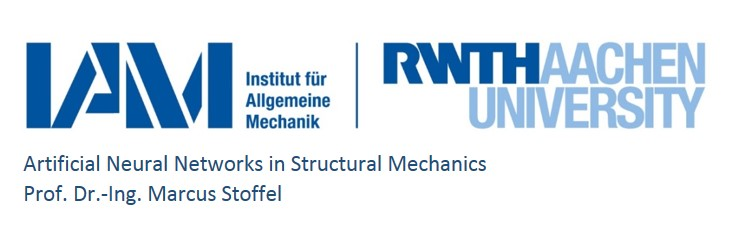

# Effort to learning viscoplastic behavior

In [18]:
# Libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [19]:
# Extract the input and the output data through .csv file
# Training Data
# Inputs: Deviatoric stress and backstress (2)
# Outputs: delp, delX, stress
# #Training samples = 4999

df   =  pd.read_csv('Viscoplastic_1D_Dataset.csv')

In [20]:
df

,Dev_trial_stress,X,Delta_p,Delta_X,sigma
0,1.348000,0.000000,0.00000,0.000000e+00,2.022000
1,2.696000,0.000000,0.00000,0.000000e+00,4.044000
2,4.044000,0.000000,0.00000,0.000000e+00,6.066000
3,5.392000,0.000000,0.00000,0.000000e+00,8.088000
4,6.740000,0.000000,0.00000,0.000000e+00,10.110000
...,...,...,...,...,...
4994,97.033257,18.787877,0.00003,5.584880e-09,143.527886
4995,97.033257,18.787877,0.00003,5.566509e-09,143.527886
4996,97.033257,18.787877,0.00003,5.548202e-09,143.527886
4997,97.033257,18.787877,0.00003,5.529952e-09,143.527886


In [21]:
# Creating the input data structures
inData = df[['Dev_trial_stress','X']]
inData

,Dev_trial_stress,X
0,1.348000,0.000000
1,2.696000,0.000000
2,4.044000,0.000000
3,5.392000,0.000000
4,6.740000,0.000000
...,...,...
4994,97.033257,18.787877
4995,97.033257,18.787877
4996,97.033257,18.787877
4997,97.033257,18.787877


In [22]:
# Creating the output data structures 
outData = df.loc[:,'Delta_p':'sigma'] # outData = df[['Delta_p','Delta_X','sigma']] can also be used
outData

,Delta_p,Delta_X,sigma
0,0.00000,0.000000e+00,2.022000
1,0.00000,0.000000e+00,4.044000
2,0.00000,0.000000e+00,6.066000
3,0.00000,0.000000e+00,8.088000
4,0.00000,0.000000e+00,10.110000
...,...,...,...
4994,0.00003,5.584880e-09,143.527886
4995,0.00003,5.566509e-09,143.527886
4996,0.00003,5.548202e-09,143.527886
4997,0.00003,5.529952e-09,143.527886


In [23]:
# Converting input and output data to numpy arrays
inData = inData.to_numpy()
outData = outData.to_numpy()

In [24]:
numIn = inData.shape[-1] # Number of inputs = Number of input neurons
numOut = outData.shape[-1] # Number of outputs = Number of output neurons
numIn

2

In [25]:
# Normalizing input and output data using MinMaxScaler
scaler = MinMaxScaler()
inp_n = scaler.fit_transform(inData)
out_n = scaler.fit_transform(outData)

In [26]:
out_n

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.42891583e-02],
       [0.00000000e+00, 0.00000000e+00, 2.85783166e-02],
       ...,
       [1.00000000e+00, 9.61896468e-08, 1.00000000e+00],
       [1.00000000e+00, 9.58732400e-08, 1.00000000e+00],
       [1.00000000e+00, 9.55579418e-08, 1.00000000e+00]])

In [27]:
# Constructing the neural network
model = Sequential()

# Input Layer
model.add(Input(shape = (numIn,)))
# Hidden Layers
numHidden = 4 # Number of hidden layers
numNeurons = 40 # Number of neurons per hidden layer
for kk in range(numHidden):
    model.add(Dense(units = numNeurons,activation='tanh'))
# Output Layer
model.add(Dense(units=numOut,activation='leaky_relu'))
opt = Adam(0.001) # Optimizer
model.compile(optimizer=opt,loss='mse') # Loss Function = Mean Squared Error
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 40)                120       
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 40)                1640      
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 3)                 123       
                                                                 
Total params: 5,163
Trainable params: 5,163
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Training the model using the normalized training input and output data
# Trainable parameters updated after 32 samples (about 156 updates to trainable parameters per epoch)
# Total times the trainable parameters are updated = 156*100 = 15600
model.fit(inp_n,out_n,batch_size=32,epochs=100) 


Epoch 1/100
157/157 [==============================] - 1s 1ms/step - loss: 0.0272
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11/100
157/157 [==============================] - 0s 1ms/step - loss: 9.4434e-04
Epoch 12/100
157/157 [==============================] - 0s 1ms/step - loss: 9.2018e-04
Epoch

157/157 [==============================] - 0s 2ms/step - loss: 2.1366e-04
Epoch 96/100
157/157 [==============================] - 0s 2ms/step - loss: 1.0085e-04
Epoch 97/100
157/157 [==============================] - 0s 2ms/step - loss: 1.8538e-04
Epoch 98/100
157/157 [==============================] - 0s 2ms/step - loss: 1.5080e-04
Epoch 99/100
157/157 [==============================] - 0s 2ms/step - loss: 1.7509e-04
Epoch 100/100
157/157 [==============================] - 0s 2ms/step - loss: 1.8406e-04


In [29]:
# Training data output prediction (training input data fed to the trained network)
out_nn = model.predict(inp_n)
out_pred = scaler.inverse_transform(out_nn) # Denormalizing the predicted output

157/157 [==============================] - 0s 1ms/step


In [30]:
out_pred.shape

(4999, 3)

In [31]:
# Comparison Plots
def comparePlot(data1,label1,data2,label2,dataType):
    # label1, label2 and dataType are strings
    # data1 and data2 are arrays
    plt.figure()
    plt.plot(data1, label=label1)
    plt.plot(data2, label=label2)
    plt.xlabel('Timesteps')
    plt.ylabel(dataType)
    plt.legend()
    plt.grid()
    plt.show()

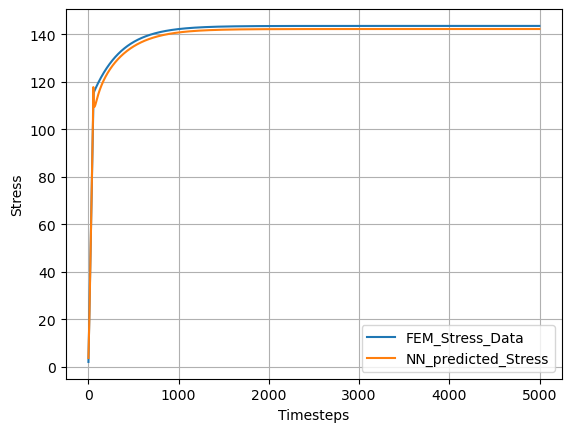

In [32]:
# Comparing training data actual stress and predicted stress
dataAct = outData[:,-1]
dataPred = out_pred[:,-1]

comparePlot(dataAct,'FEM_Stress_Data',dataPred,'NN_predicted_Stress','Stress')

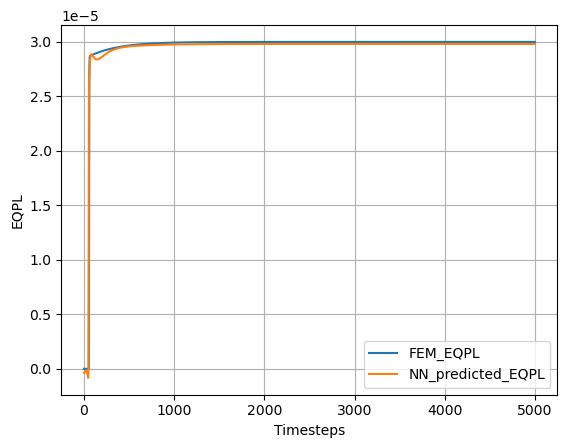

In [33]:
# Comparing training data actual eqv. plastic rate and predicted eqv. plastic rate
dataAct = outData[:,0]
dataPred = out_pred[:,0]

comparePlot(dataAct,'FEM_EQPL',dataPred,'NN_predicted_EQPL','EQPL')

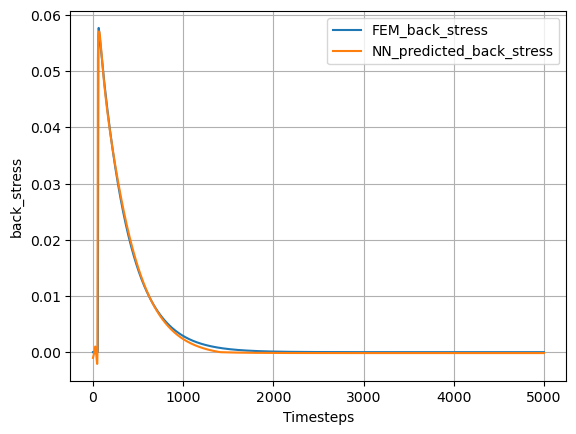

In [34]:
# Comparing training data actual backstress and predicted backstress
dataAct = outData[:,1]
dataPred = out_pred[:,1]

comparePlot(dataAct,'FEM_back_stress',dataPred,'NN_predicted_back_stress','back_stress')